In [1]:
'''
VISUALS FILE

This file was created by duplicating the AdHocAnalysis_SyTalisha.ipynb file and deleting the unnecessary cells so that only the cells that produce the pivot tables and graphs needed are visible.
This is done to fulfill the deliverable of a short deck containing your visuals and tables.

'''

# ORIGINAL DATAFRAME
# importing the necessary libraries

import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# reading the json file containing the transaction data

with open ('transaction-data-adhoc-analysis.json', 'r') as f:
    trans_data = json.load(f)
    
# translating the json file to a dataframe

df = pd.DataFrame(trans_data)
df

,address,birthdate,mail,name,sex,username,transaction_items,transaction_value,transaction_date
0,USNS Wagner\nFPO AE 00917,1926/03/11,watsonbrenda@gmail.com,Jennifer Campbell,F,veronicawells,"Exotic Extras,Beef Chicharon,(x4)",5196,2022/01/12
1,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"Exotic Extras,Beef Chicharon,(x3);HealthyKid 3...",12056,2022/01/12
2,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"HealthyKid 3+,Gummy Vitamins,(x3);HealthyKid 3...",5500,2022/01/08
3,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"HealthyKid 3+,Yummy Vegetables,(x1)",500,2022/01/10
4,"33911 Hansen Loaf\nWest Sandra, ND 54188",1949/09/27,michael78@yahoo.com,Kristen Cooper,F,qhernandez,"Candy City,Orange Beans,(x3);Candy City,Gummy ...",2697,2022/01/24
...,...,...,...,...,...,...,...,...,...
83031,"96081 Harrison Brooks\nJenniferbury, MA 02124",2019/10/26,christina55@hotmail.com,Tammy Byrd,F,kmcconnell,"Exotic Extras,Kimchi and Seaweed,(x2);HealthyK...",3588,2022/06/05
83032,428 Kristopher Curve Apt. 206\nMcculloughville...,1913/11/04,melvinschmidt@hotmail.com,Donald Andersen,M,llowe,"HealthyKid 3+,Yummy Vegetables,(x1);Exotic Ext...",2095,2022/06/12
83033,428 Kristopher Curve Apt. 206\nMcculloughville...,1913/11/04,melvinschmidt@hotmail.com,Donald Andersen,M,llowe,"Candy City,Orange Beans,(x4);Candy City,Gummy ...",3396,2022/06/15
83034,428 Kristopher Curve Apt. 206\nMcculloughville...,1913/11/04,melvinschmidt@hotmail.com,Donald Andersen,M,llowe,"HealthyKid 3+,Nutrional Milk,(x2);Candy City,G...",4280,2022/06/09


In [2]:
#PRICE DATAFRAME
# dataframe to calculate the sale price per type of item

item_df = df['transaction_items'].str.split(';',expand=True)
item_df
df2 = df.loc[:,"transaction_value"]
frames = [df2, item_df]
result = pd.concat(frames, axis=1, join='inner')
price_df = result
price_df.columns = ['transaction_value', 'item type one', 'item type two', 'item type three']
price_df

,transaction_value,item type one,item type two,item type three
0,5196,"Exotic Extras,Beef Chicharon,(x4)",None,None
1,12056,"Exotic Extras,Beef Chicharon,(x3)","HealthyKid 3+,Nutrional Milk,(x4)","Candy City,Orange Beans,(x1)"
2,5500,"HealthyKid 3+,Gummy Vitamins,(x3)","HealthyKid 3+,Yummy Vegetables,(x2)",None
3,500,"HealthyKid 3+,Yummy Vegetables,(x1)",None,None
4,2697,"Candy City,Orange Beans,(x3)","Candy City,Gummy Worms,(x4)","HealthyKid 3+,Gummy Vitamins,(x1)"
...,...,...,...,...
83031,3588,"Exotic Extras,Kimchi and Seaweed,(x2)","HealthyKid 3+,Nutrional Milk,(x1)",None
83032,2095,"HealthyKid 3+,Yummy Vegetables,(x1)","Exotic Extras,Kimchi and Seaweed,(x1)","Candy City,Orange Beans,(x4)"
83033,3396,"Candy City,Orange Beans,(x4)","Candy City,Gummy Worms,(x4)","HealthyKid 3+,Yummy Vegetables,(x4)"
83034,4280,"HealthyKid 3+,Nutrional Milk,(x2)","Candy City,Gummy Worms,(x2)",None


In [3]:
# GRANULARITY DATAFRAME
# for the granularity of one “line item” per row

df['transaction_items'] = df['transaction_items'].str.split(';')
df.explode('transaction_items').reset_index(drop=True)
IndivTrans_df = df.explode('transaction_items').reset_index(drop=True)
IndivTrans_df

,address,birthdate,mail,name,sex,username,transaction_items,transaction_value,transaction_date
0,USNS Wagner\nFPO AE 00917,1926/03/11,watsonbrenda@gmail.com,Jennifer Campbell,F,veronicawells,"Exotic Extras,Beef Chicharon,(x4)",5196,2022/01/12
1,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"Exotic Extras,Beef Chicharon,(x3)",12056,2022/01/12
2,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"HealthyKid 3+,Nutrional Milk,(x4)",12056,2022/01/12
3,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"Candy City,Orange Beans,(x1)",12056,2022/01/12
4,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"HealthyKid 3+,Gummy Vitamins,(x3)",5500,2022/01/08
...,...,...,...,...,...,...,...,...,...
166114,428 Kristopher Curve Apt. 206\nMcculloughville...,1913/11/04,melvinschmidt@hotmail.com,Donald Andersen,M,llowe,"HealthyKid 3+,Nutrional Milk,(x2)",4280,2022/06/09
166115,428 Kristopher Curve Apt. 206\nMcculloughville...,1913/11/04,melvinschmidt@hotmail.com,Donald Andersen,M,llowe,"Candy City,Gummy Worms,(x2)",4280,2022/06/09
166116,"PSC 1089, Box 3720\nAPO AE 08973",2012/04/30,xjones@hotmail.com,Stephanie Russell,F,cmcdowell,"HealthyKid 3+,Nutrional Milk,(x1)",2639,2022/06/03
166117,"PSC 1089, Box 3720\nAPO AE 08973",2012/04/30,xjones@hotmail.com,Stephanie Russell,F,cmcdowell,"Candy City,Gummy Worms,(x3)",2639,2022/06/03


In [4]:
# GRANULARITY DATAFRAME WITH QUANTITY
# obtaining the quantity purchased of each item

IndivTrans_df2=IndivTrans_df.replace("HealthyKid 3+",'HealthyKid Three',regex=True)
IndivTrans_df2['quantity'] = IndivTrans_df2['transaction_items'].str.extract('([0-9]+)')
IndivTrans_df=IndivTrans_df2.replace('THREE+','HealthyKid 3',regex=True)
IndivTrans_df

,address,birthdate,mail,name,sex,username,transaction_items,transaction_value,transaction_date,quantity
0,USNS Wagner\nFPO AE 00917,1926/03/11,watsonbrenda@gmail.com,Jennifer Campbell,F,veronicawells,"Exotic Extras,Beef Chicharon,(x4)",5196,2022/01/12,4
1,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"Exotic Extras,Beef Chicharon,(x3)",12056,2022/01/12,3
2,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"HealthyKid Three+,Nutrional Milk,(x4)",12056,2022/01/12,4
3,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"Candy City,Orange Beans,(x1)",12056,2022/01/12,1
4,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"HealthyKid Three+,Gummy Vitamins,(x3)",5500,2022/01/08,3
...,...,...,...,...,...,...,...,...,...,...
166114,428 Kristopher Curve Apt. 206\nMcculloughville...,1913/11/04,melvinschmidt@hotmail.com,Donald Andersen,M,llowe,"HealthyKid Three+,Nutrional Milk,(x2)",4280,2022/06/09,2
166115,428 Kristopher Curve Apt. 206\nMcculloughville...,1913/11/04,melvinschmidt@hotmail.com,Donald Andersen,M,llowe,"Candy City,Gummy Worms,(x2)",4280,2022/06/09,2
166116,"PSC 1089, Box 3720\nAPO AE 08973",2012/04/30,xjones@hotmail.com,Stephanie Russell,F,cmcdowell,"HealthyKid Three+,Nutrional Milk,(x1)",2639,2022/06/03,1
166117,"PSC 1089, Box 3720\nAPO AE 08973",2012/04/30,xjones@hotmail.com,Stephanie Russell,F,cmcdowell,"Candy City,Gummy Worms,(x3)",2639,2022/06/03,3


In [6]:
# GRANULARITY DATAFRAME WITH QUANTITY AND TRANSACTION MONTH
# obtaining the transaction month

IndivTrans_df['transaction_month'] = pd.DatetimeIndex(IndivTrans_df['transaction_date']).month_name()
IndivTrans_df

,address,birthdate,mail,name,sex,username,transaction_items,transaction_value,transaction_date,quantity,transaction_month
0,USNS Wagner\nFPO AE 00917,1926/03/11,watsonbrenda@gmail.com,Jennifer Campbell,F,veronicawells,"Exotic Extras,Beef Chicharon,(x4)",5196,2022/01/12,4,January
1,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"Exotic Extras,Beef Chicharon,(x3)",12056,2022/01/12,3,January
2,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"HealthyKid Three+,Nutrional Milk,(x4)",12056,2022/01/12,4,January
3,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"Candy City,Orange Beans,(x1)",12056,2022/01/12,1,January
4,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"HealthyKid Three+,Gummy Vitamins,(x3)",5500,2022/01/08,3,January
...,...,...,...,...,...,...,...,...,...,...,...
166114,428 Kristopher Curve Apt. 206\nMcculloughville...,1913/11/04,melvinschmidt@hotmail.com,Donald Andersen,M,llowe,"HealthyKid Three+,Nutrional Milk,(x2)",4280,2022/06/09,2,June
166115,428 Kristopher Curve Apt. 206\nMcculloughville...,1913/11/04,melvinschmidt@hotmail.com,Donald Andersen,M,llowe,"Candy City,Gummy Worms,(x2)",4280,2022/06/09,2,June
166116,"PSC 1089, Box 3720\nAPO AE 08973",2012/04/30,xjones@hotmail.com,Stephanie Russell,F,cmcdowell,"HealthyKid Three+,Nutrional Milk,(x1)",2639,2022/06/03,1,June
166117,"PSC 1089, Box 3720\nAPO AE 08973",2012/04/30,xjones@hotmail.com,Stephanie Russell,F,cmcdowell,"Candy City,Gummy Worms,(x3)",2639,2022/06/03,3,June


In [7]:
# GRANULARITY DATAFRAME WITH QUANTITY, TRANSACTION MONTH, AND TRUTH TABLE
# making a truth table in order to obtain the breakdown of the count of each item sold per month

IndivTrans_df['Beef Chicharon'] = IndivTrans_df['transaction_items'].str.contains('Beef Chicharon')
IndivTrans_df['Kimchi and Seaweed'] = IndivTrans_df['transaction_items'].str.contains('Kimchi and Seaweed')
IndivTrans_df['Nutrional Milk'] = IndivTrans_df['transaction_items'].str.contains('Nutrional Milk')
IndivTrans_df['Gummy Vitamins'] = IndivTrans_df['transaction_items'].str.contains('Gummy Vitamins')
IndivTrans_df['Yummy Vegetables'] = IndivTrans_df['transaction_items'].str.contains('Yummy Vegetables')
IndivTrans_df['Orange Beans'] = IndivTrans_df['transaction_items'].str.contains('Orange Beans')
IndivTrans_df['Gummy Worms'] = IndivTrans_df['transaction_items'].str.contains('Gummy Worms')
IndivTrans_df

,address,birthdate,mail,name,sex,username,transaction_items,transaction_value,transaction_date,quantity,transaction_month,Beef Chicharon,Kimchi and Seaweed,Nutrional Milk,Gummy Vitamins,Yummy Vegetables,Orange Beans,Gummy Worms
0,USNS Wagner\nFPO AE 00917,1926/03/11,watsonbrenda@gmail.com,Jennifer Campbell,F,veronicawells,"Exotic Extras,Beef Chicharon,(x4)",5196,2022/01/12,4,January,True,False,False,False,False,False,False
1,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"Exotic Extras,Beef Chicharon,(x3)",12056,2022/01/12,3,January,True,False,False,False,False,False,False
2,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"HealthyKid Three+,Nutrional Milk,(x4)",12056,2022/01/12,4,January,False,False,True,False,False,False,False
3,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"Candy City,Orange Beans,(x1)",12056,2022/01/12,1,January,False,False,False,False,False,True,False
4,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"HealthyKid Three+,Gummy Vitamins,(x3)",5500,2022/01/08,3,January,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166114,428 Kristopher Curve Apt. 206\nMcculloughville...,1913/11/04,melvinschmidt@hotmail.com,Donald Andersen,M,llowe,"HealthyKid Three+,Nutrional Milk,(x2)",4280,2022/06/09,2,June,False,False,True,False,False,False,False
166115,428 Kristopher Curve Apt. 206\nMcculloughville...,1913/11/04,melvinschmidt@hotmail.com,Donald Andersen,M,llowe,"Candy City,Gummy Worms,(x2)",4280,2022/06/09,2,June,False,False,False,False,False,False,True
166116,"PSC 1089, Box 3720\nAPO AE 08973",2012/04/30,xjones@hotmail.com,Stephanie Russell,F,cmcdowell,"HealthyKid Three+,Nutrional Milk,(x1)",2639,2022/06/03,1,June,False,False,True,False,False,False,False
166117,"PSC 1089, Box 3720\nAPO AE 08973",2012/04/30,xjones@hotmail.com,Stephanie Russell,F,cmcdowell,"Candy City,Gummy Worms,(x3)",2639,2022/06/03,3,June,False,False,False,False,False,False,True


In [9]:
# TRANSACTION DATA DATAFRAME
# the breakdown of the count of each item sold per month

def sales_quantity(month):
    return IndivTrans_df.loc[(IndivTrans_df['Beef Chicharon']==True)&(IndivTrans_df['transaction_month']==month),'quantity'].sum()

BC = [sales_quantity(i) for i in transaction_months]
BC.append(sum(BC[0:6]))

def sales_quantity(month):
    return IndivTrans_df.loc[(IndivTrans_df['Kimchi and Seaweed']==True)&(IndivTrans_df['transaction_month']==month),'quantity'].sum()

KS = [sales_quantity(i) for i in transaction_months]
KS.append(sum(KS[0:6]))

def sales_quantity(month):
    return IndivTrans_df.loc[(IndivTrans_df['Nutrional Milk']==True)&(IndivTrans_df['transaction_month']==month),'quantity'].sum()

NM = [sales_quantity(i) for i in transaction_months]
NM.append(sum(NM[0:6]))

def sales_quantity(month):
    return IndivTrans_df.loc[(IndivTrans_df['Gummy Vitamins']==True)&(IndivTrans_df['transaction_month']==month),'quantity'].sum()

GV = [sales_quantity(i) for i in transaction_months]
GV.append(sum(GV[0:6]))

def sales_quantity(month):
    return IndivTrans_df.loc[(IndivTrans_df['Yummy Vegetables']==True)&(IndivTrans_df['transaction_month']==month),'quantity'].sum()

YV = [sales_quantity(i) for i in transaction_months]
YV.append(sum(YV[0:6]))

def sales_quantity(month):
    return IndivTrans_df.loc[(IndivTrans_df['Orange Beans']==True)&(IndivTrans_df['transaction_month']==month),'quantity'].sum()

OB = [sales_quantity(i) for i in transaction_months]
OB.append(sum(OB[0:6]))

def sales_quantity(month):
    return IndivTrans_df.loc[(IndivTrans_df['Gummy Worms']==True)&(IndivTrans_df['transaction_month']==month),'quantity'].sum()

GW = [sales_quantity(i) for i in transaction_months]
GW.append(sum(GW[0:6]))

# the dataframe for the breakdown of the count of each item sold per month
TransactionData_df = pd.DataFrame(
    {'Beef Chicharon':BC, 
     'Kimchi and Seaweed': KS,
     'Nutrional Milk': NM,
     'Gummy Vitamins':GV,
     'Yummy Vegetables': YV,
     'Orange Beans': OB,
     'Gummy Worms': GW
    }, index = pd.Index(['January', 'February', 'March', 'April', 'May', 'June', 'Total']))

TransactionData_df

,Beef Chicharon,Kimchi and Seaweed,Nutrional Milk,Gummy Vitamins,Yummy Vegetables,Orange Beans,Gummy Worms
January,9665,9676,9727,9681,9959,9774,9559
February,10001,9949,9691,9980,10256,10037,9996
March,9816,9967,9876,10145,9896,9611,9986
April,9890,9921,9786,9842,9861,9914,10043
May,10028,9773,9881,9948,9735,9964,9801
June,9902,10104,9767,9980,9722,10106,9934
Total,59302,59390,58728,59576,59429,59406,59319


In [12]:
# SALES DATAFRAME
# the breakdown of the total sale value per item per month

BC1 = TransactionData_df['Beef Chicharon'].mul(BeefChicharon_Price)
KS1 = TransactionData_df['Kimchi and Seaweed'].mul(KimchiandSeaweed_Price)
NM1 = TransactionData_df['Nutrional Milk'].mul(NutrionalMilk_Price)
GV1 = TransactionData_df['Gummy Vitamins'].mul(GummyVitamins_Price)
YV1 = TransactionData_df['Yummy Vegetables'].mul(YummyVegetables_Price)
OB1 = TransactionData_df['Orange Beans'].mul(OrangeBeans_Price)
GW1 = TransactionData_df['Gummy Worms'].mul(GummyWorms_Price)

Sales_df = pd.DataFrame(
    {'Beef Chicharon':BC1, 
     'Kimchi and Seaweed': KS1,
     'Nutrional Milk': NM1,
     'Gummy Vitamins':GV1,
     'Yummy Vegetables': YV1,
     'Orange Beans': OB1,
     'Gummy Worms': GW1
    }, index = pd.Index(['January', 'February', 'March', 'April', 'May', 'June', 'Total']))

Sales_df

,Beef Chicharon,Kimchi and Seaweed,Nutrional Milk,Gummy Vitamins,Yummy Vegetables,Orange Beans,Gummy Worms
January,12554835,7731124,19356730,14521500,4979500,1945026,1433850
February,12991299,7949251,19285090,14970000,5128000,1997363,1499400
March,12750984,7963633,19653240,15217500,4948000,1912589,1497900
April,12847110,7926879,19474140,14763000,4930500,1972886,1506450
May,13026372,7808627,19663190,14922000,4867500,1982836,1470150
June,12862698,8073096,19436330,14970000,4861000,2011094,1490100
Total,77033298,47452610,116868720,89364000,29714500,11821794,8897850


In [13]:
# REARRANGED GRANULARITY DATAFRAME WITH QUANTITY, TRANSACTION MONTH, AND TRUTH TABLE
IndivTrans_df = IndivTrans_df.groupby(['name','transaction_month'],as_index=False).first()
IndivTrans_df

,name,transaction_month,address,birthdate,mail,sex,username,transaction_items,transaction_value,transaction_date,quantity,Beef Chicharon,Kimchi and Seaweed,Nutrional Milk,Gummy Vitamins,Yummy Vegetables,Orange Beans,Gummy Worms
0,Aaron Beasley,April,"1464 Ian Squares Apt. 351\nJasonberg, ND 95840",1999/02/07,lvaldez@yahoo.com,M,hermanjustin,"HealthyKid Three+,Nutrional Milk,(x1)",4588,2022/04/24,1,False,False,True,False,False,False,False
1,Aaron Beasley,June,"1464 Ian Squares Apt. 351\nJasonberg, ND 95840",1999/02/07,lvaldez@yahoo.com,M,hermanjustin,"HealthyKid Three+,Gummy Vitamins,(x1)",1500,2022/06/27,1,False,False,False,True,False,False,False
2,Aaron Beasley,May,"1464 Ian Squares Apt. 351\nJasonberg, ND 95840",1999/02/07,lvaldez@yahoo.com,M,hermanjustin,"HealthyKid Three+,Gummy Vitamins,(x3)",4500,2022/05/22,3,False,False,False,True,False,False,False
3,Aaron Brewer,April,"31499 Donna Locks\nTaylorfurt, MO 98699",1938/02/25,allisonkatherine@hotmail.com,M,kathryn58,"Candy City,Gummy Worms,(x4)",600,2022/04/05,4,False,False,False,False,False,False,True
4,Aaron Brewer,February,"31499 Donna Locks\nTaylorfurt, MO 98699",1938/02/25,allisonkatherine@hotmail.com,M,kathryn58,"Candy City,Gummy Worms,(x3)",6420,2022/02/26,3,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39612,Zachary York,February,"46641 Williams Bypass Suite 868\nGalvanfurt, N...",1920/07/11,ronald36@hotmail.com,M,jesusdaniel,"Candy City,Gummy Worms,(x4)",6194,2022/02/22,4,False,False,False,False,False,False,True
39613,Zachary York,January,"46641 Williams Bypass Suite 868\nGalvanfurt, N...",1920/07/11,ronald36@hotmail.com,M,jesusdaniel,"HealthyKid Three+,Nutrional Milk,(x4)",7960,2022/01/03,4,False,False,True,False,False,False,False
39614,Zachary York,June,"46641 Williams Bypass Suite 868\nGalvanfurt, N...",1920/07/11,ronald36@hotmail.com,M,jesusdaniel,"HealthyKid Three+,Gummy Vitamins,(x1)",5696,2022/06/10,1,False,False,False,True,False,False,False
39615,Zachary York,March,"46641 Williams Bypass Suite 868\nGalvanfurt, N...",1920/07/11,ronald36@hotmail.com,M,jesusdaniel,"HealthyKid Three+,Gummy Vitamins,(x4)",11970,2022/03/18,4,False,False,False,True,False,False,False


In [14]:
# PROCESS FOR PURCHASE HISTORY DATAFRAME
IndivTrans_df.drop(['address','birthdate','mail','sex','username','transaction_value','transaction_date','transaction_items','quantity','Beef Chicharon','Kimchi and Seaweed','Nutrional Milk','Gummy Vitamins','Yummy Vegetables','Orange Beans','Gummy Worms'], inplace=True, axis=1)
IndivTrans_df

,name,transaction_month
0,Aaron Beasley,April
1,Aaron Beasley,June
2,Aaron Beasley,May
3,Aaron Brewer,April
4,Aaron Brewer,February
...,...,...
39612,Zachary York,February
39613,Zachary York,January
39614,Zachary York,June
39615,Zachary York,March


In [16]:
# PURCHASE HISTORY DATAFRAME
combine = lambda x:', '.join(x.astype(str))
PurchaseHistory_df = IndivTrans_df.groupby(['name'], as_index=False).agg({'transaction_month':combine})
PurchaseHistory_df

,name,transaction_month
0,Aaron Beasley,"April, June, May"
1,Aaron Brewer,"April, February, January, June, March"
2,Aaron Brown,"April, June, March, May"
3,Aaron Coffey,"April, February, January, March, May"
4,Aaron Davis,"April, February, January, June, May"
...,...,...
8482,Zachary Valentine,"April, February, January, June, March, May"
8483,Zachary Ware,"April, February, January, June, March, May"
8484,Zachary Williams,"April, February, January, March"
8485,Zachary Wilson,"April, June, May"


In [17]:
# PURCHASE HISTORY DATAFRAME WITH TRUTH TABLE
# creating a truth table to determine the customers' purchase history

PurchaseHistory_df['January'] = PurchaseHistory_df['transaction_month'].str.contains('January')
PurchaseHistory_df['February'] = PurchaseHistory_df['transaction_month'].str.contains('February')
PurchaseHistory_df['March'] = PurchaseHistory_df['transaction_month'].str.contains('March')
PurchaseHistory_df['April'] = PurchaseHistory_df['transaction_month'].str.contains('April')
PurchaseHistory_df['May'] = PurchaseHistory_df['transaction_month'].str.contains('May')
PurchaseHistory_df['June'] = PurchaseHistory_df['transaction_month'].str.contains('June')
PurchaseHistory_df

,name,transaction_month,January,February,March,April,May,June
0,Aaron Beasley,"April, June, May",False,False,False,True,True,True
1,Aaron Brewer,"April, February, January, June, March",True,True,True,True,False,True
2,Aaron Brown,"April, June, March, May",False,False,True,True,True,True
3,Aaron Coffey,"April, February, January, March, May",True,True,True,True,True,False
4,Aaron Davis,"April, February, January, June, May",True,True,False,True,True,True
...,...,...,...,...,...,...,...,...
8482,Zachary Valentine,"April, February, January, June, March, May",True,True,True,True,True,True
8483,Zachary Ware,"April, February, January, June, March, May",True,True,True,True,True,True
8484,Zachary Williams,"April, February, January, March",True,True,True,True,False,False
8485,Zachary Wilson,"April, June, May",False,False,False,True,True,True


In [18]:
# PURCHASE HISTORY DATAFRAME TRUTH TABLE CONVERTED TO A SEPARATE COUNT DATAFRAME
# determining what months each customer had a purchase

count_df = PurchaseHistory_df.loc[:,transaction_months[0]:transaction_months[len(transaction_months)-1]]
count_df = count_df*1
count_df

,January,February,March,April,May,June
0,0,0,0,1,1,1
1,1,1,1,1,0,1
2,0,0,1,1,1,1
3,1,1,1,1,1,0
4,1,1,0,1,1,1
...,...,...,...,...,...,...
8482,1,1,1,1,1,1
8483,1,1,1,1,1,1
8484,1,1,1,1,0,0
8485,0,0,0,1,1,1


In [19]:
# PURCHASE HISTORY DATAFRAME WITHOUT MONTH COLUMNS
PurchaseHistory_df.drop(['January', 'February', 'March', 'April', 'May', 'June'], inplace=True, axis=1)
PurchaseHistory_df

,name,transaction_month
0,Aaron Beasley,"April, June, May"
1,Aaron Brewer,"April, February, January, June, March"
2,Aaron Brown,"April, June, March, May"
3,Aaron Coffey,"April, February, January, March, May"
4,Aaron Davis,"April, February, January, June, May"
...,...,...
8482,Zachary Valentine,"April, February, January, June, March, May"
8483,Zachary Ware,"April, February, January, June, March, May"
8484,Zachary Williams,"April, February, January, March"
8485,Zachary Wilson,"April, June, May"


In [20]:
# PURCHASE HISTORY DATAFRAME AND COUNT DATAFRAME COMBINED
# combining the two dataframes for better comprehension

PurchaseCount_df = pd.concat([PurchaseHistory_df, count_df], axis=1, join='inner')
PurchaseCount_df

,name,transaction_month,January,February,March,April,May,June
0,Aaron Beasley,"April, June, May",0,0,0,1,1,1
1,Aaron Brewer,"April, February, January, June, March",1,1,1,1,0,1
2,Aaron Brown,"April, June, March, May",0,0,1,1,1,1
3,Aaron Coffey,"April, February, January, March, May",1,1,1,1,1,0
4,Aaron Davis,"April, February, January, June, May",1,1,0,1,1,1
...,...,...,...,...,...,...,...,...
8482,Zachary Valentine,"April, February, January, June, March, May",1,1,1,1,1,1
8483,Zachary Ware,"April, February, January, June, March, May",1,1,1,1,1,1
8484,Zachary Williams,"April, February, January, March",1,1,1,1,0,0
8485,Zachary Wilson,"April, June, May",0,0,0,1,1,1


In [22]:
# REPEATERS, INACTIVE, AND ENGAGED DATAFRAME
# inputting the data collected into a dataframe

tally = [R, I, E]
RIE_df = pd.DataFrame(columns = ['January', 'February', 'March', 'April', 'May', 'June'], index = ['Repeaters', 'Inactive', 'Engaged'], data = tally)
RIE_df

,January,February,March,April,May,June
Repeaters,0,5172,5216,5154,5110,5193
Inactive,0,1416,1747,1909,1917,1835
Engaged,6588,5172,4126,3289,2667,2190


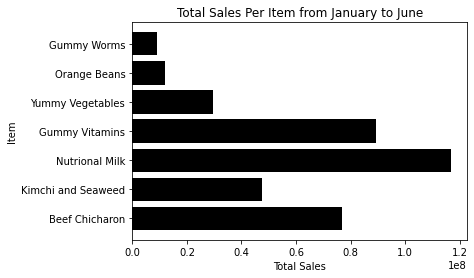

In [23]:
# Horizontal Bar Graph for Total Sales per Item from January to June

Total = [Sales_df.loc['Total']['Beef Chicharon'], Sales_df.loc['Total']['Kimchi and Seaweed'], Sales_df.loc['Total']['Nutrional Milk'], Sales_df.loc['Total']['Gummy Vitamins'], Sales_df.loc['Total']['Yummy Vegetables'], Sales_df.loc['Total']['Orange Beans'], Sales_df.loc['Total']['Gummy Worms']]

plt.barh(df3['item'], width = Total, color = 'black')
plt.title('Total Sales Per Item from January to June')
plt.xlabel('Total Sales')
plt.ylabel('Item')
plt.show()

In [24]:
# SALES DATAFRAME WITHOUT TOTAL
Sales_df.drop(['Total'], axis=0, inplace=True)
Sales_df

,Beef Chicharon,Kimchi and Seaweed,Nutrional Milk,Gummy Vitamins,Yummy Vegetables,Orange Beans,Gummy Worms
January,12554835,7731124,19356730,14521500,4979500,1945026,1433850
February,12991299,7949251,19285090,14970000,5128000,1997363,1499400
March,12750984,7963633,19653240,15217500,4948000,1912589,1497900
April,12847110,7926879,19474140,14763000,4930500,1972886,1506450
May,13026372,7808627,19663190,14922000,4867500,1982836,1470150
June,12862698,8073096,19436330,14970000,4861000,2011094,1490100


In [25]:
# Line Plot for Sales per Item per Month

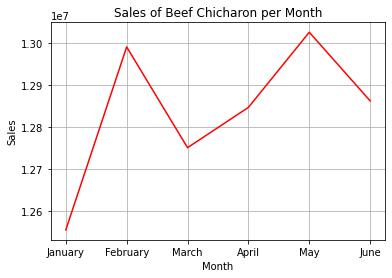

In [26]:
plt.plot(df2['month'], Sales_df['Beef Chicharon'], label = 'Beef Chicharon',  color = 'red')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Sales of Beef Chicharon per Month')
plt.grid()

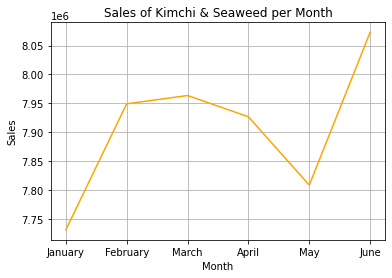

In [27]:
plt.plot(df2['month'], Sales_df['Kimchi and Seaweed'], label = 'Kimchi and Seaweed',  color = 'orange')
plt.title('Sales of Kimchi & Seaweed per Month')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.grid()
plt.show()

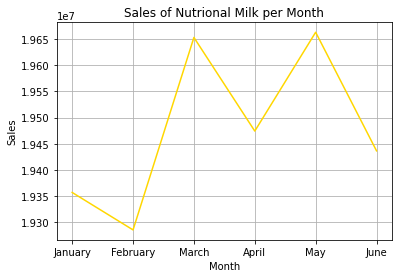

In [28]:
plt.plot(df2['month'], Sales_df['Nutrional Milk'], label = 'Nutrional Milk',  color = 'gold')
plt.title('Sales of Nutrional Milk per Month')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.grid()
plt.show()

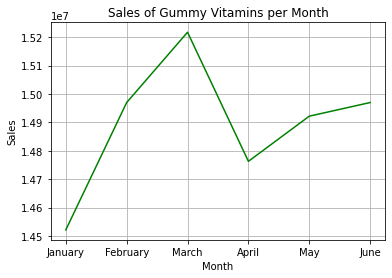

In [29]:
plt.plot(df2['month'], Sales_df['Gummy Vitamins'], label = 'Gummy Vitamins',  color = 'green')
plt.title('Sales of Gummy Vitamins per Month')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.grid()
plt.show()

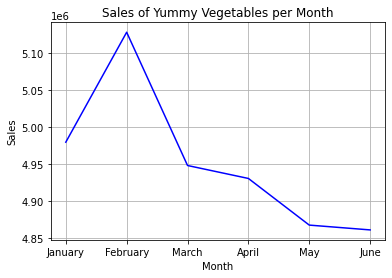

In [30]:
plt.plot(df2['month'], Sales_df['Yummy Vegetables'], label = 'Yummy Vegetables',  color = 'blue')
plt.title('Sales of Yummy Vegetables per Month')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.grid()
plt.show()

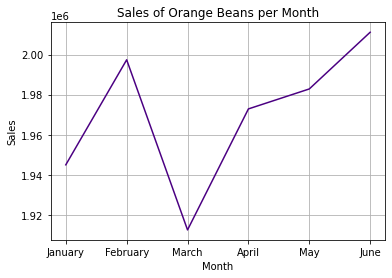

In [31]:
plt.plot(df2['month'], Sales_df['Orange Beans'], label = 'Orange Beans',  color = 'indigo')
plt.title('Sales of Orange Beans per Month')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.grid()
plt.show()

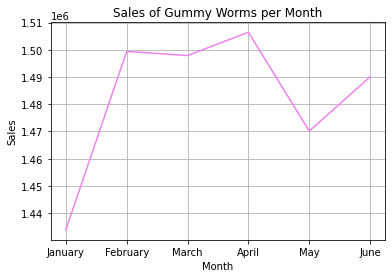

In [32]:
plt.plot(df2['month'], Sales_df['Gummy Worms'], label = 'Gummy Worms',  color = 'violet')
plt.title('Sales of Gummy Worms per Month')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.grid()
plt.show()

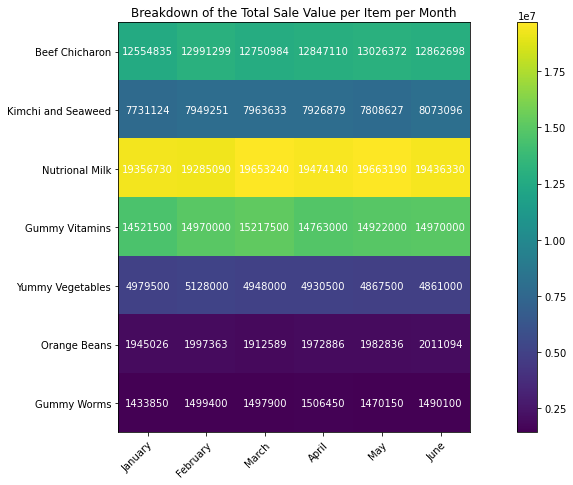

In [33]:
# Heat Map for the Breakdown of the Total Sale Value per Item per Month

tally3 = np.array([Sales_df['Beef Chicharon'],Sales_df['Kimchi and Seaweed'],Sales_df['Nutrional Milk'],Sales_df['Gummy Vitamins'],Sales_df['Yummy Vegetables'],Sales_df['Orange Beans'],Sales_df['Gummy Worms']])

fig, ax = plt.subplots()
im = ax.imshow(tally3)

ax.set_xticks(np.arange(len(transaction_months)), labels = transaction_months)
ax.set_yticks(np.arange(len(item)), labels = item)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

for i in range(len(item)):
    for j in range(len(transaction_months)):
        text = ax.text(j, i, tally3[i, j],
                       ha="center", va="center", color="w")

ax.set_title("Breakdown of the Total Sale Value per Item per Month")
fig.tight_layout()
plt.gcf().set_size_inches(15, 8)
plt.colorbar(im)
plt.show()

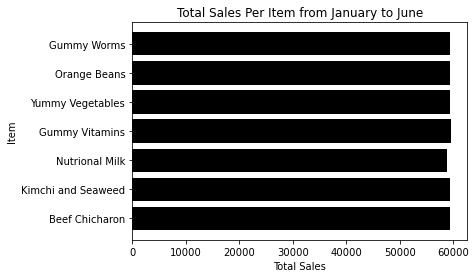

In [34]:
# horizontal bar graph for Total Count per Item from January to June

Total = [TransactionData_df.loc['Total']['Beef Chicharon'], TransactionData_df.loc['Total']['Kimchi and Seaweed'], TransactionData_df.loc['Total']['Nutrional Milk'], TransactionData_df.loc['Total']['Gummy Vitamins'], TransactionData_df.loc['Total']['Yummy Vegetables'], TransactionData_df.loc['Total']['Orange Beans'], TransactionData_df.loc['Total']['Gummy Worms']]
plt.barh(df3['item'], width = Total, color = 'Black')
plt.title('Total Sales Per Item from January to June')
plt.xlabel('Total Sales')
plt.ylabel('Item')
plt.show()

In [35]:
# TRANSACTION DATA DATAFRAME WITHOUT TOTAL
TransactionData_df.drop(['Total'], axis=0, inplace=True)
TransactionData_df

,Beef Chicharon,Kimchi and Seaweed,Nutrional Milk,Gummy Vitamins,Yummy Vegetables,Orange Beans,Gummy Worms
January,9665,9676,9727,9681,9959,9774,9559
February,10001,9949,9691,9980,10256,10037,9996
March,9816,9967,9876,10145,9896,9611,9986
April,9890,9921,9786,9842,9861,9914,10043
May,10028,9773,9881,9948,9735,9964,9801
June,9902,10104,9767,9980,9722,10106,9934


In [36]:
# Pie Chart for Count per Item per Month

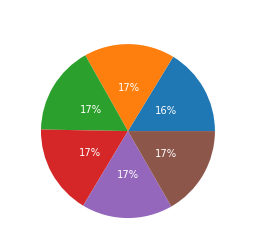

In [38]:
plt.pie(TransactionData_df['Beef Chicharon'], labels = transaction_months, autopct='%1.0f%%', pctdistance=0.5, labeldistance=1.1)
plt.rcParams['text.color'] = 'white'
plt.title('Count of Beef Chicharon Sold per Month')
plt.show()

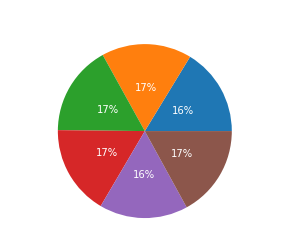

In [39]:
plt.pie(TransactionData_df['Kimchi and Seaweed'], labels = transaction_months, autopct='%1.0f%%', pctdistance=0.5, labeldistance=1.1)
plt.rcParams['text.color'] = 'white'
plt.title('Count of Kimchi and Seaweed Sold per Month')
plt.show()

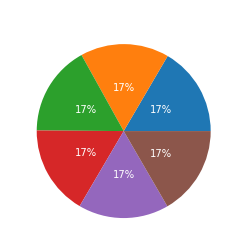

In [40]:
plt.pie(TransactionData_df['Nutrional Milk'], labels = transaction_months, autopct='%1.0f%%', pctdistance=0.5, labeldistance=1.1)
plt.rcParams['text.color'] = 'white'
plt.title('Count of Nutrional Milk Sold per Month')
plt.show()

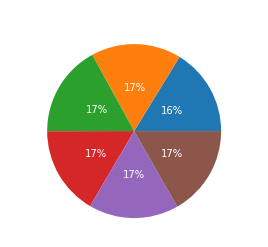

In [41]:
plt.pie(TransactionData_df['Gummy Vitamins'], labels = transaction_months, autopct='%1.0f%%', pctdistance=0.5, labeldistance=1.1)
plt.rcParams['text.color'] = 'white'
plt.title('Count of Gummy Vitamins Sold per Month')
plt.show()

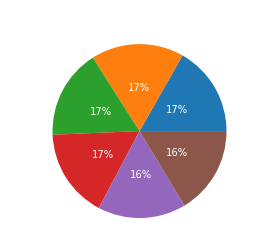

In [42]:
plt.pie(TransactionData_df['Yummy Vegetables'], labels = transaction_months, autopct='%1.0f%%', pctdistance=0.5, labeldistance=1.1)
plt.rcParams['text.color'] = 'white'
plt.title('Count of Yummy Vegetables Sold per Month')
plt.show()

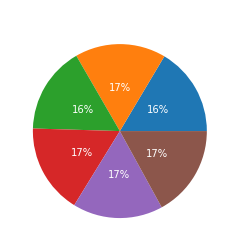

In [43]:
plt.pie(TransactionData_df['Orange Beans'], labels = transaction_months, autopct='%1.0f%%', pctdistance=0.5, labeldistance=1.1)
plt.rcParams['text.color'] = 'white'
plt.title('Count of Orange Beans per Month')
plt.show()

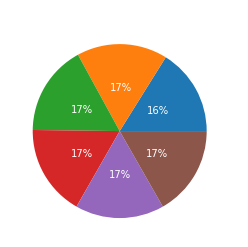

In [44]:
plt.pie(TransactionData_df['Gummy Worms'], labels = transaction_months, autopct='%1.0f%%', pctdistance=0.5, labeldistance=1.1)
plt.rcParams['text.color'] = 'white'
plt.title('Count of Gummy Worms per Month')
plt.show()

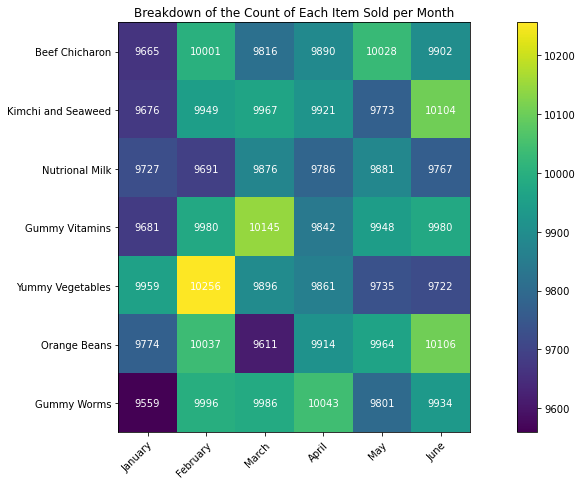

In [56]:
# Heat Map for the Breakdown of the Count of Each Item Sold per Month

tally2 = np.array([TransactionData_df['Beef Chicharon'],TransactionData_df['Kimchi and Seaweed'],TransactionData_df['Nutrional Milk'],TransactionData_df['Gummy Vitamins'],TransactionData_df['Yummy Vegetables'],TransactionData_df['Orange Beans'],TransactionData_df['Gummy Worms']])


fig, ax = plt.subplots()
im = ax.imshow(tally2)

ax.set_xticks(np.arange(len(transaction_months)), labels = transaction_months)
ax.set_yticks(np.arange(len(item)), labels = item)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

for i in range(len(item)):
    for j in range(len(transaction_months)):
        text = ax.text(j, i, tally2[i, j],
                       ha="center", va="center", color="w")

ax.set_title("Breakdown of the Count of Each Item Sold per Month",color="black")
fig.tight_layout()
plt.gcf().set_size_inches(15, 8)
plt.colorbar(im)
plt.show()

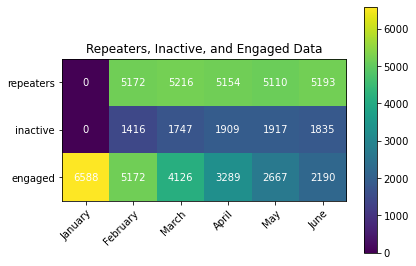

In [55]:
# Heat Map for the Repeaters, Inactive, and Engaged Data

required = ['repeaters', 'inactive', 'engaged']
tally1 = np.array(tally)


fig, ax = plt.subplots()
im = ax.imshow(tally1)

ax.set_xticks(np.arange(len(transaction_months)), labels = transaction_months)
ax.set_yticks(np.arange(len(required)), labels = required)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

for i in range(len(required)):
    for j in range(len(transaction_months)):
        text = ax.text(j, i, tally1[i, j],
                       ha="center", va="center", color="w")

fig.tight_layout()
ax.set_title("Repeaters, Inactive, and Engaged Data", color="black")
plt.colorbar(im)
plt.show()

In [58]:
RIE_df2 = RIE_df.T
RIE_df2

,Repeaters,Inactive,Engaged
January,0,0,6588
February,5172,1416,5172
March,5216,1747,4126
April,5154,1909,3289
May,5110,1917,2667
June,5193,1835,2190


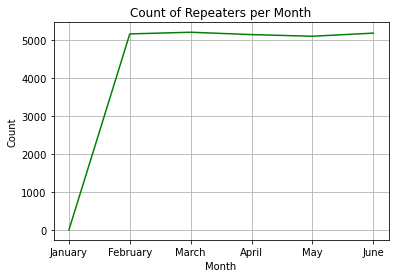

In [59]:
# Line Plot for Repeaters Data

plt.plot(df2['month'], RIE_df2['Repeaters'], label = 'Repeaters',  color = 'green')
plt.title('Count of Repeaters per Month',color="black")
plt.xlabel('Month')
plt.ylabel('Count')
plt.grid()
plt.show()

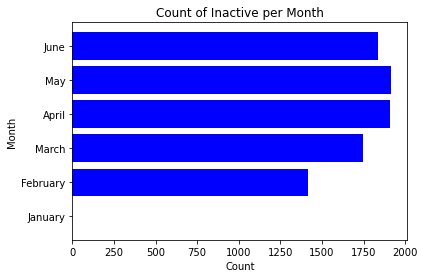

In [60]:
# Horizontal Bar Chart for Inactive Data

plt.barh(df2['month'], width = RIE_df2['Inactive'], color = 'blue')
plt.title('Count of Inactive per Month',color="black")
plt.xlabel('Count')
plt.ylabel('Month')
plt.show()

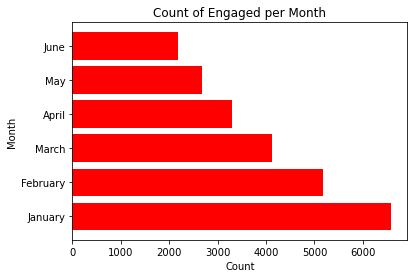

In [61]:
# Horizontal Bar Chart for Engaged Data

plt.barh(df2['month'], width = RIE_df2['Engaged'], color = 'red')
plt.title('Count of Engaged per Month',color="black")
plt.xlabel('Count')
plt.ylabel('Month')
plt.show()